Scale =  10.120 +/- 0.636
Offset = 3.170 +/- 0.147
Sigma =  1.676 +/- 0.220


/home/cfzhang/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:2818: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


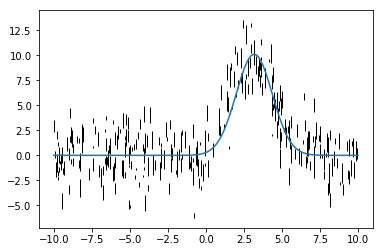

In [14]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
# Create a function
# ==> First encounter with *whitespace* in Python <==
def gaussian(x, a, b, c):
    val = a * np.exp(-(x - b)**2 / c**2)
    return val

# Generate fake data.
# Note: functions in random package, array arithmetic (exp)
n = 100
x = np.random.uniform(-10., 10., n)
y = np.exp(-(x - 3.)**2 / 4) * 10. + np.random.normal(0., 2., n)
e = np.random.uniform(0.1, 1., n)
# Note: these error bars don't reflect the distribution from which
# they were drawn! Chi^2 of the fit will be poor.

# Fit
popt, pcov = curve_fit(gaussian, x, y, sigma=e)

# Print results
print("Scale =  %.3f +/- %.3f" % (popt[0], np.sqrt(pcov[0, 0])))
print("Offset = %.3f +/- %.3f" % (popt[1], np.sqrt(pcov[1, 1])))
print("Sigma =  %.3f +/- %.3f" % (popt[2], np.sqrt(pcov[2, 2])))

# Plot data
plt.errorbar(x, y, yerr=e, linewidth=1, color='black', fmt=None)

# Plot model
xm = np.linspace(-10., 10., 100)  # 100 evenly spaced points
plt.plot(xm, gaussian(xm, popt[0], popt[1], popt[2]))
plt.show()
# Save figure
#savefig('fit.png')
